## Retail Bank Study

### Problem Definition:
1. To explore the current data set and identify the group / profile of customers which responded positively to the campaign. Understanding of customer profile will later help in doing targeted marketing campaigns.
2. Predict if a customer will subscribe to the term deposit or not, based on given data.


### Data Exploration

In [ ]:
# import data set
data = pd.read_csv("marketing_dataset 2.csv", sep=";", na_values=[999, 'unknown'])

There are multiple ways of exploring this data set (eg: Descriptive & Visual). We will proceeed with the descriptive way to be abl to follow the exact statistics of the data.

The given data set belongs to a retail bank. It consist of  values 3000 observations and 21 features. The given data set has few null values also, but looks like they are being coded as 999 & 'Unknown' observations. A feature `pdays` has 96% missing values as shown in following cell.

In [80]:
## missing values by features
data.isna().sum(axis=0).sort_values(ascending=False) / data.shape[0]

pdays             0.962988
default           0.198733
education         0.046015
housing           0.025675
loan              0.025675
job               0.010670
marital           0.003001
duration          0.000333
day_of_week       0.000000
contact           0.000000
month             0.000000
y                 0.000000
nr.employed       0.000000
campaign          0.000000
previous          0.000000
poutcome          0.000000
emp.var.rate      0.000000
cons.price.idx    0.000000
cons.conf.idx     0.000000
euribor3m         0.000000
age               0.000000
dtype: float64

### Hypothesis Generation

In any data science problem, generating hypothesis is extremely important to be able to understand: <br>

1) <strong>Gain business understanding</strong> - Knowing how the business works helps a lot in understand the impact of problem 

2) <strong>Scope of features which can affect the problem</strong> - Knowing what features we have currently / might need in future 
also helps in steering a data science project in the right direction.


Based on a typical retail bank, we hypothesis the following:
1. <strong>Age</strong>:  Age of a customers should be important. Too young or too old customers might not be interested in investing in any sort of financial instruments.
2. <strong>Occupation</strong>: People with jobs are more likely to buy a product as compared to jobless people.
3. <strong>Married Status</strong>: Since married people have more responsibility, they are more likely to subscribe to financial products which promises them future security
4. <strong> Salary </strong>: People with fat salaries are likely to buy such products.
5. <strong> Education </strong>: Educated people understand the value of investing in such products as compared to uneducated people, hence the are more likely to subscribe to such products.
6. <strong>Number of dependents</strong>: People having dependents are more likely to invest in such products as compared to people having no dependents.
7. <strong>Past history</strong>: People who have invested in such products in the past and completed the term period are more likely to invest again.

Now, let's look the data and understand the information given to us. <br>
The dependent variable has following distribution:

In [75]:
p = data.y.value_counts(normalize=True)
print(f'Only {round(p[1], 2)}% people bought term deposit and the rest {round(p[0], 2)}% did not buy. This is a classic imbalanced classification problem.')

Only 0.11% people bought term deposit and the rest 0.89% did not buy. This is a classic imbalanced classification problem


Let's take a quick look at the other statistics:

In [76]:
# view statistics of all features
for x in data.columns:
    print(x, data[x].dtype)
    print('-'*100)
    if data[x].dtype != 'object':
        print(data.groupby('y')[x].describe())
        print('*'*100)
    else:
        print(data.groupby('y')[x].value_counts(normalize=True, ascending=False, sort=True).unstack())

age int64
----------------------------------------------------------------------------------------------------
      count       mean        std   min   25%   50%   75%   max
y                                                              
no   2668.0  39.673538   9.880855  18.0  32.0  38.0  47.0  88.0
yes   331.0  41.628399  12.963035  18.0  31.0  39.0  50.0  86.0
****************************************************************************************************
job object
----------------------------------------------------------------------------------------------------
job    admin.  blue-collar  entrepreneur  housemaid  management   retired  \
y                                                                           
no   0.244411     0.225085      0.039409   0.024252    0.081091  0.034483   
yes  0.298780     0.152439      0.024390   0.018293    0.057927  0.082317   

job  self-employed  services   student  technician  unemployed  
y                                             

Following are the main insights:
1. The mean age of people who bought the product is 41 with a standard dev. of 12 years.
2. Approx. 30% of the people having admin jobs bought the product, followedd by people with technician jobs.
3. Out of all the people who subscribed to term deposit, 55% of them were married.
4. 39% of the people had a university degree who subscribed.
5. May seems to be the most impactful month for marketing campaigns. May has the highest number of conversions.
6. Similarly, for the day of the week, Monday is the most important.

### Prediction Model

Since, this given data is imbalanced, we are going to to a <strong>gradient boosting decision tree</strong> model because:
1. The data has some null values, tree based model is robust null values.
2. Tree based model is robust to outliers, we don't need to worry about them.
3. Tree based model can detect the non-linear behaviour in the data, thus providing better predictions than linear model

In [ ]:
# import libraries
from sklearn.model_selection import train_test_split
import lightgbm as lgb

In [ ]:
# convert cat to numeric
for x in cat_cols:
    print(x)
    data[x] = pd.factorize(data[x])[0]

In [8]:
# split into train and test
target = data['y']
X_train, X_valid, y_train, y_valid = train_test_split(data, target, test_size = 0.3, stratify = target)

X_train = X_train.drop(['y'], axis=1)
X_valid = X_valid.drop(['y'], axis=1)

<strong>Note:</strong> We do a stratify split here to ensure the distribution of dependent variable doesn't change.

In [21]:
## params values after parameter tuning
param = {
    'num_leaves': 18,
     'max_bin': 63,
     'min_data_in_leaf': 5,
     'learning_rate': 0.010614430970330217,
     'min_sum_hessian_in_leaf': 0.0093586657313989123,
     'feature_fraction': 0.056701788569420042,
     'lambda_l1': 0.060222413158420585,
     'lambda_l2': 4.6580550589317573,
     'min_gain_to_split': 0.29588543202055562,
     'max_depth': 49,
     'save_binary': True,
     'seed': 1337,
     'feature_fraction_seed': 1337,
     'bagging_seed': 1337,
     'drop_seed': 1337,
     'data_random_seed': 1337,
     'objective': 'binary',
     'boosting_type': 'gbdt',
     'verbose': 1,
     'metric': 'auc',
     'is_unbalance': True,
     'boost_from_average': False
}

In [22]:
xg_train = lgb.Dataset(X_train.values,
                           label=y_train.values,
                           feature_name=X_train.columns.tolist(),
                           free_raw_data = False
                           )
xg_valid = lgb.Dataset(X_valid.values,
                       label=y_valid.values,
                       feature_name=X_train.columns.tolist(),
                       free_raw_data = False
                       )   

In [35]:
clf = lgb.train(param, 
                xg_train,
                2000, 
                valid_sets = [xg_train, xg_valid], 
                verbose_eval=100)

/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py:1027: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[100]	training's auc: 0.907827	valid_1's auc: 0.914211
[200]	training's auc: 0.900994	valid_1's auc: 0.907237
[300]	training's auc: 0.903275	valid_1's auc: 0.908196
[400]	training's auc: 0.906479	valid_1's auc: 0.907363
[500]	training's auc: 0.911678	valid_1's auc: 0.910453
[600]	training's auc: 0.916774	valid_1's auc: 0.913959
[700]	training's auc: 0.92285	valid_1's auc: 0.917691
[800]	training's auc: 0.926145	valid_1's auc: 0.91894
[900]	training's auc: 0.931085	valid_1's auc: 0.921941
[1000]	training's auc: 0.933602	valid_1's auc: 0.922672
[1100]	training's auc: 0.939237	valid_1's auc: 0.926229
[1200]	training's auc: 0.941465	valid_1's auc: 0.926947
[1300]	training's auc: 0.946036	valid_1's auc: 0.929015
[1400]	training's auc: 0.947073	valid_1's auc: 0.928852
[1500]	training's auc: 0.949123	valid_1's auc: 0.92923
[1600]	training's auc: 0.951365	valid_1's auc: 0.929797
[1700]	training's auc: 0.953246	valid_1's auc: 0.930138
[1800]	training's auc: 0.954717	valid_1's auc: 0.93044
[1900

<strong>Note:</strong> We see that the model returns 0.93 AUC score on validation set. We are using AUC here because:
1. Since it's an imbalanced problem, we need to be sure about false positives. We can use a global metric such as accuracy.
2. AUC will help us detect the false positive, because usually for companies commiting false positives are expensive.

Now, we'll quickly see what features are important:

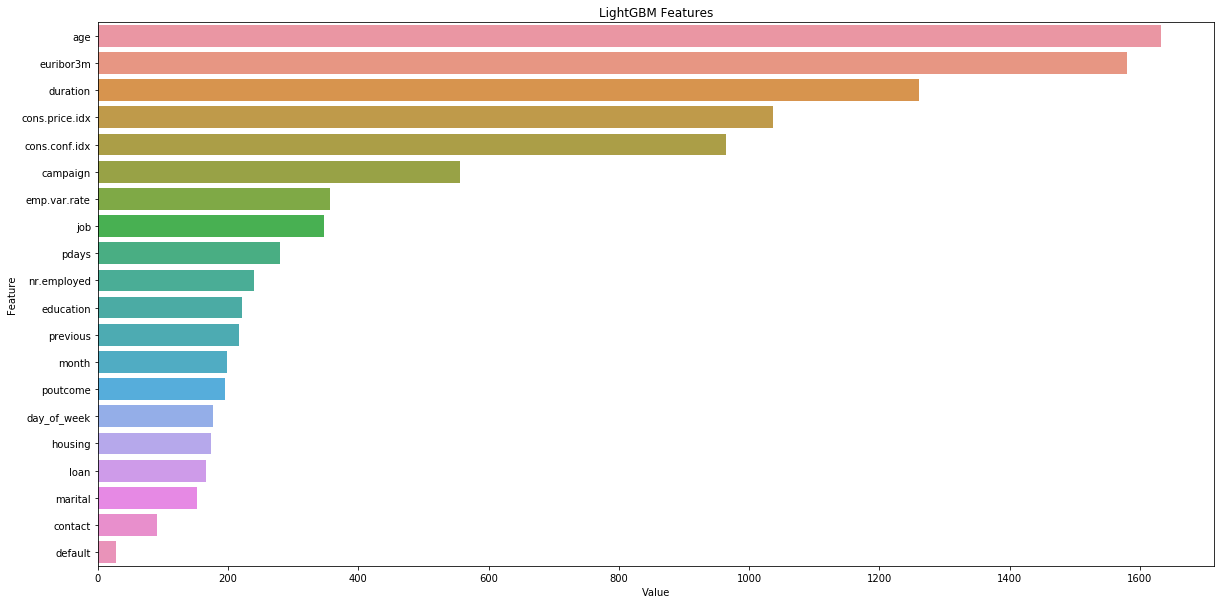

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_imp = pd.DataFrame(sorted(zip(clf.feature_importance(),X_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.show()

### Summary

In this report, we achieved 0.93 AUC score in determining whether a customer will subscribe to a term deposit or not. We explored customer profile i.e. what kind of people are more likely to subscribe to this product based on past data. We also learned that the given problem is an imbalanced problem, hence we need to very careful in deciding model evaluation. We cannot use global metrics like accuracy which are mis-leading in this case.